In [388]:
# https://github.com/panicpotatoe/dataset
# 1.mỗi features có bao nhiêu missing values
# 2.đối với mỗi features thì sử dụng phương pháp gì (drop / impute, etc...)?
# 3.xác định outliers của từng features và xử lý outliers
# 4.so sánh tính chất của raw data và data đã được pre-processed (số lượng r/c, distribution, etc..)

In [389]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype


In [390]:
df = pd.read_csv('https://raw.githubusercontent.com/panicpotatoe/dataset/master/titatic_train.csv')
df_raw = df
len_df_raw = len(df_raw)
df.shape

(891, 12)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [392]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [393]:
# Cau 1
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [394]:
# Ta thấy có 3 cột chứa missing value Age, Cabin, Embarked
# cột PassengerId là Id định danh của hành khách nên có thể lượt bỏ
df.drop(columns=['PassengerId'], inplace=True)

In [395]:
#2. Cách xử lý các missing value trên
# Age: dùng phương pháp điền giá trị mean cho missing value ở cột Age
# Cabin: điền giá trị 0 vào vị trí NA
# Embarked: xoá nếu chứa NA

In [396]:
#Age
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(int(mean_age))
df['Age'] 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [397]:
#Cabin
#Vì đây là cột có giá trị null nhiều nhất, nếu xoá thì bộ dữ liệu train sẽ còn lại rất ít
# Vì vậy tiến hành điền giá trị 0 cho những vị trí NA, với ý nghĩa là người dùng ko cung cấp thông tin vị trí cabin
df['Cabin'] = df['Cabin'].fillna(0)

In [398]:
#Embarked
df.dropna(subset=['Embarked'], inplace=True)

In [399]:
# bộ dữ liệu sau khi xử lý NA
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

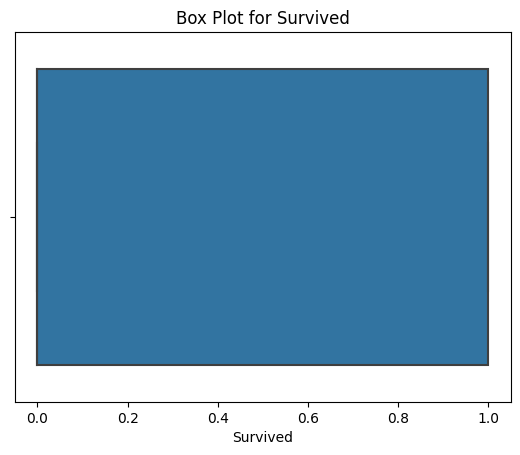

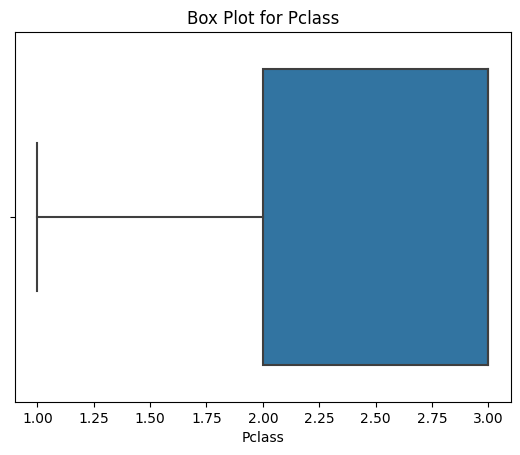

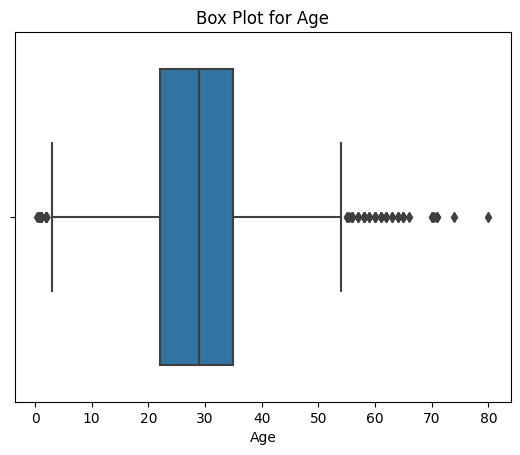

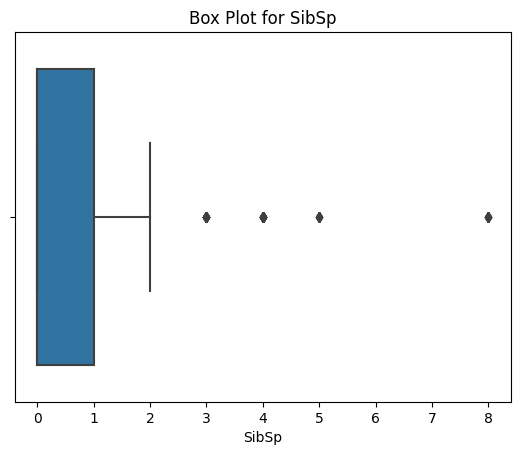

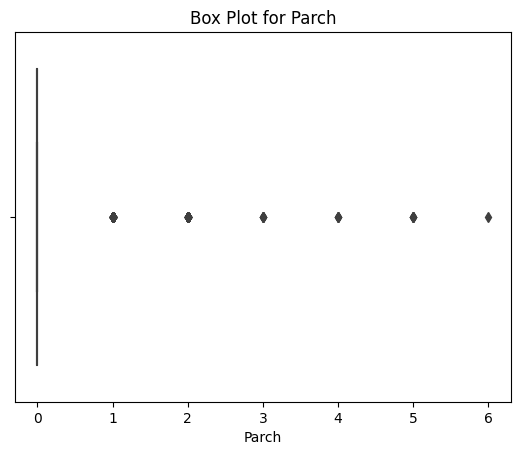

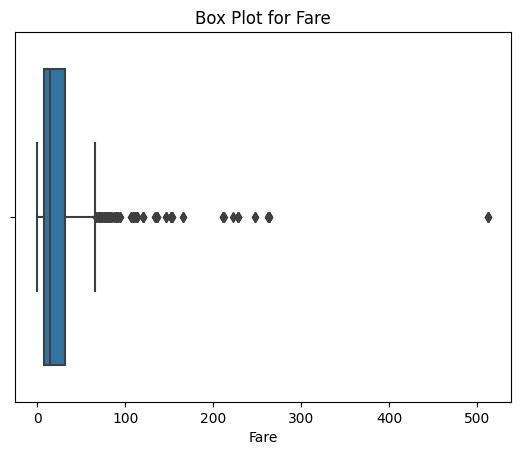

In [400]:
#trước khi xủ lý outliers
header = df.columns
for i in header:
    if is_numeric_dtype(df[i]):
        plt.figure()
        sns.boxplot(x=df[i])
        plt.title(f'Box Plot for {i}')
        plt.show()

In [401]:
# Cau 3
header = df.columns

def check_outliers(val):
    k = 1.5
    Q1 = val.quantile(0.25)
    Q3 = val.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    res = val[(val < lower_bound) | (val > upper_bound)]
    return res

def handle_outliers(column_name, index):
    if(column_name == 'Age'):
        mean_age = int(df['Age'].mean())
        df.loc[index, "Age"] = mean_age
    if(column_name == 'SibSp'):
        mean_SibSp = int(df['SibSp'].mean())
        df.loc[index, "SibSp"] = mean_SibSp
    if(column_name == 'Parch'):
        mean_Parch = int(df['Parch'].mean())
        df.loc[index, "Parch"] = mean_Parch
    if(column_name == 'Fare'):
        mean_Fare = float(df['Fare'].mean())
        df.loc[index, "Fare"] = mean_Fare

def get_col_outliers(header):
    for i in header:
        if is_numeric_dtype(df[i]):
            list_outliers = check_outliers(df[i])
            
            if not list_outliers.empty:
                print(f"Colum '{i}' Tồn Tại {len( list_outliers) } Giá trị ngoại lai")
            else:
                print(f'{i} Không tồn tại giá trị ngoại lai')

#Xử lý outliers
for i in header:
    if is_numeric_dtype(df[i]):
        list_outliers = check_outliers(df[i])
        
        if not list_outliers.empty:
            print(f"Colum '{i}' Tồn Tại Giá trị ngoại lai")
            for index in list_outliers.index:
                handle_outliers(i, index)    
            print(f"Đã xử lý {len( list_outliers) } giá trị ngoại lai của cột {i}")
            print('--------------------')
            
        else:
            print(f'{i} Không tồn tại giá trị ngoại lai')
            print('--------------------')


Survived Không tồn tại giá trị ngoại lai
--------------------
Pclass Không tồn tại giá trị ngoại lai
--------------------
Colum 'Age' Tồn Tại Giá trị ngoại lai
Đã xử lý 65 giá trị ngoại lai của cột Age
--------------------
Colum 'SibSp' Tồn Tại Giá trị ngoại lai
Đã xử lý 46 giá trị ngoại lai của cột SibSp
--------------------
Colum 'Parch' Tồn Tại Giá trị ngoại lai
Đã xử lý 213 giá trị ngoại lai của cột Parch
--------------------
Colum 'Fare' Tồn Tại Giá trị ngoại lai
Đã xử lý 114 giá trị ngoại lai của cột Fare
--------------------


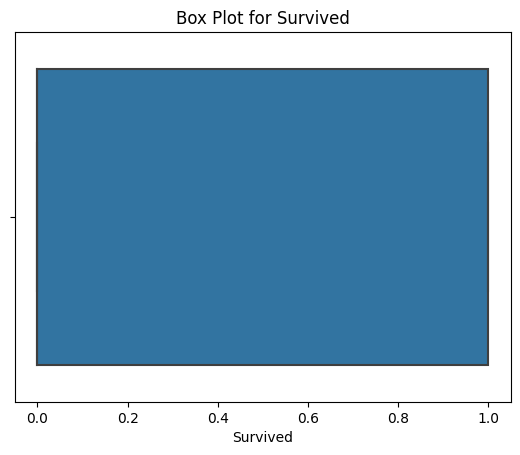

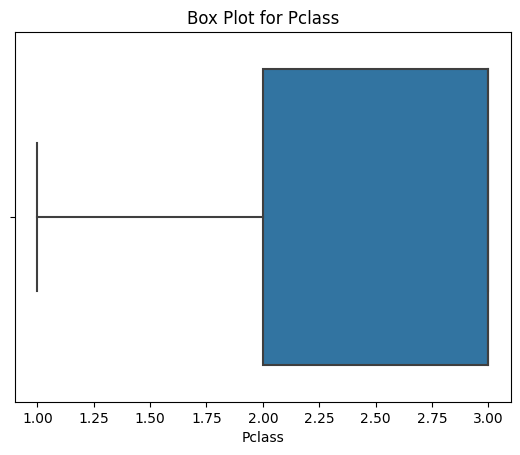

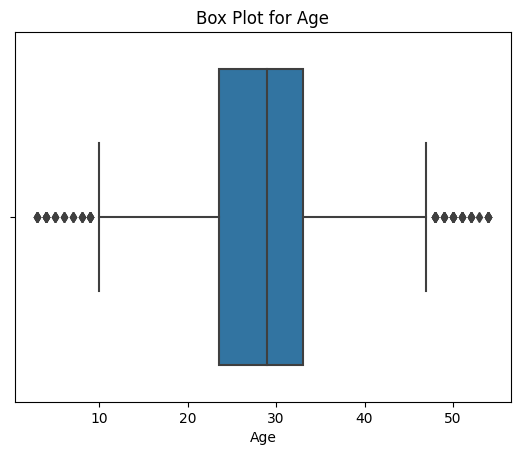

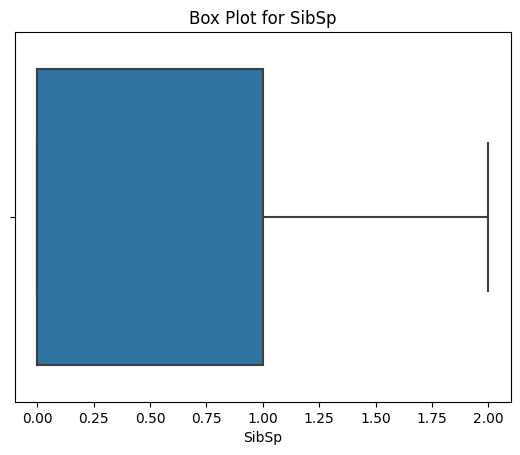

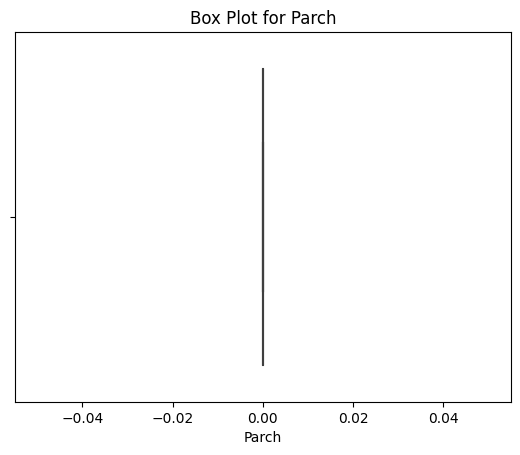

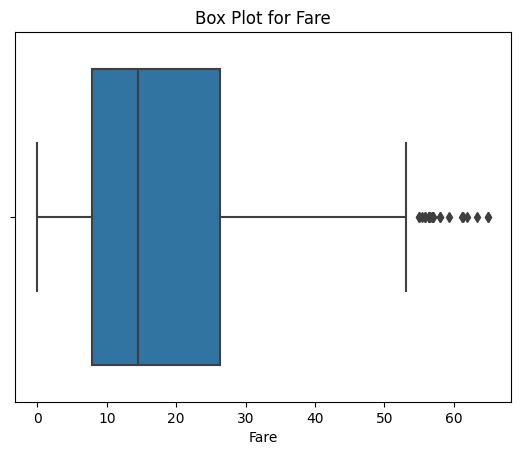

In [402]:
#sau khi xủ lý outliers
header = df.columns
for i in header:
    if is_numeric_dtype(df[i]):
        plt.figure()
        sns.boxplot(x=df[i])
        plt.title(f'Box Plot for {i}')
        plt.show()

In [403]:
# cau 4
print(f'Kích thước tệp dữ liệu sau khi xử lý: {df.shape}\n')
print('Kiểm tra NA sau khi xử lý')
print(df.isna().sum())

len_df = len(df)

if(len_df > len_df_raw):
    print(f'Số lượng dòng tăng {len_df - len_df_raw} so với dữ liệu gốc')
elif(len_df < len_df_raw):
    print(f'Số lượng dòng giảm {len_df_raw - len_df} so với dữ liệu gốc')
else:
    print(f'Số lượng dòng không thay đổi')


Kích thước tệp dữ liệu sau khi xử lý: (889, 11)

Kiểm tra NA sau khi xử lý
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64
Số lượng dòng giảm 2 so với dữ liệu gốc
